Correlation between VWAP score and RSI score:
            vwap_score  rsi_score
vwap_score    1.000000  -0.086975
rsi_score    -0.086975   1.000000


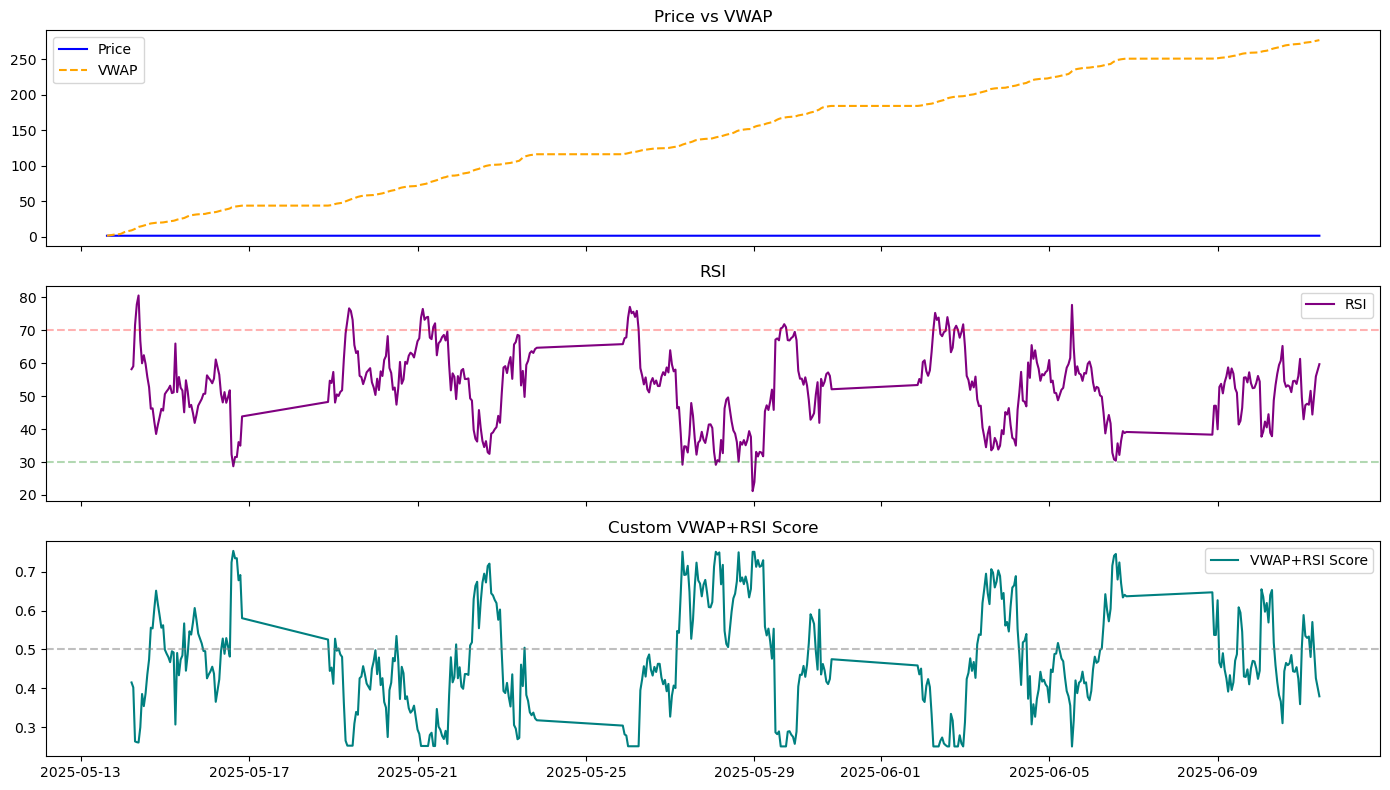

In [67]:
import oandapyV20
from oandapyV20 import API
from oandapyV20.endpoints.instruments import InstrumentsCandles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta 
from scipy.signal import argrelextrema

# =============================
# 1. Fetch Historical Data
# =============================
def fetch_data(instrument="EUR_USD", granularity="H1", count=500):
    client = API(access_token="32a7ce5d62167ef2dda800802386d48a-496bae9b01506113e0a75dbac8e7a693",
                 environment="practice")  # Use "live" if needed
    params = {"granularity": granularity, "count": count}
    r = InstrumentsCandles(instrument=instrument, params=params)
    client.request(r)

    data = [{
        'datetime': candle['time'],
        'open': float(candle['mid']['o']),
        'high': float(candle['mid']['h']),
        'low': float(candle['mid']['l']),
        'close': float(candle['mid']['c']),
        'volume': candle['volume']
    } for candle in r.response['candles']]

    df = pd.DataFrame(data)
    df['datetime'] = pd.to_datetime(df['datetime'])
    df.set_index('datetime', inplace=True)
    df = df[['open', 'high', 'low', 'close', 'volume']].copy()
    return df

# =============================
# 2. Calculate Indicators
# =============================
def calculate_indicators(df):
    # VWAP
    df['vwap'] = (df['close'].cumsum() * df['volume']).cumsum() / df['volume'].cumsum()

    # RSI
    df['rsi'] = ta.rsi(df['close'], length=14)

    return df

# =============================
# 3. Normalize Components
# =============================
def normalize_vwap_rsi(df):
    # VWAP deviation score
    df['vwap_deviation'] = (df['close'] - df['vwap']) / df['vwap']
    df['vwap_score'] = 1 / (1 + abs(df['vwap_deviation']))

    # Directional sign: bearish = -1 if above vwap, bullish = +1
    df['vwap_direction'] = np.where(df['close'] > df['vwap'], -1, 1)

    # RSI Score: oversold = high score, overbought = low score
    df['rsi_score'] = np.where(df['rsi'] < 30, 1,
                               np.where(df['rsi'] > 70, 0, (70 - df['rsi']) / 40))

    return df

# =============================
# 4. Combine Into One Score
# =============================
def create_custom_score(df, weight_vwap=0.5, weight_rsi=0.5):
    df['vwap_rsi_score'] = (weight_vwap * df['vwap_score'] * df['vwap_direction']) + \
                           (weight_rsi * df['rsi_score'])
    return df

# =============================
# 5. Correlation Check
# =============================
def check_correlation(df):
    corr_matrix = df[['vwap_score', 'rsi_score']].corr()
    print("Correlation between VWAP score and RSI score:")
    print(corr_matrix)

# =============================
# 6. Plot Everything
# =============================
def plot_results(df):
    fig, axes = plt.subplots(3, 1, figsize=(14, 8), sharex=True)

    # Price & VWAP
    axes[0].plot(df['close'], label='Price', color='blue')
    axes[0].plot(df['vwap'], label='VWAP', linestyle='--', color='orange')
    axes[0].set_title('Price vs VWAP')
    axes[0].legend()

    # RSI
    axes[1].plot(df['rsi'], label='RSI', color='purple')
    axes[1].axhline(70, linestyle='--', color='red', alpha=0.3)
    axes[1].axhline(30, linestyle='--', color='green', alpha=0.3)
    axes[1].set_title('RSI')
    axes[1].legend()

    # Custom Score
    axes[2].plot(df['vwap_rsi_score'], label='VWAP+RSI Score', color='teal')
    axes[2].axhline(0.5, linestyle='--', color='gray', alpha=0.5)
    axes[2].set_title('Custom VWAP+RSI Score')
    axes[2].legend()

    plt.tight_layout()
    plt.show()

# =============================
# Main Pipeline
# =============================
if __name__ == '__main__':
    df = fetch_data(instrument="EUR_USD", granularity="H1", count=500)
    df = calculate_indicators(df)
    df = normalize_vwap_rsi(df)
    df = create_custom_score(df)
    check_correlation(df)
    plot_results(df)


=== Performance Summary ===
Total Trades: 71
Win Rate: 53.52%
Avg PnL per Trade: 0.08%
Total Return: 5.88%


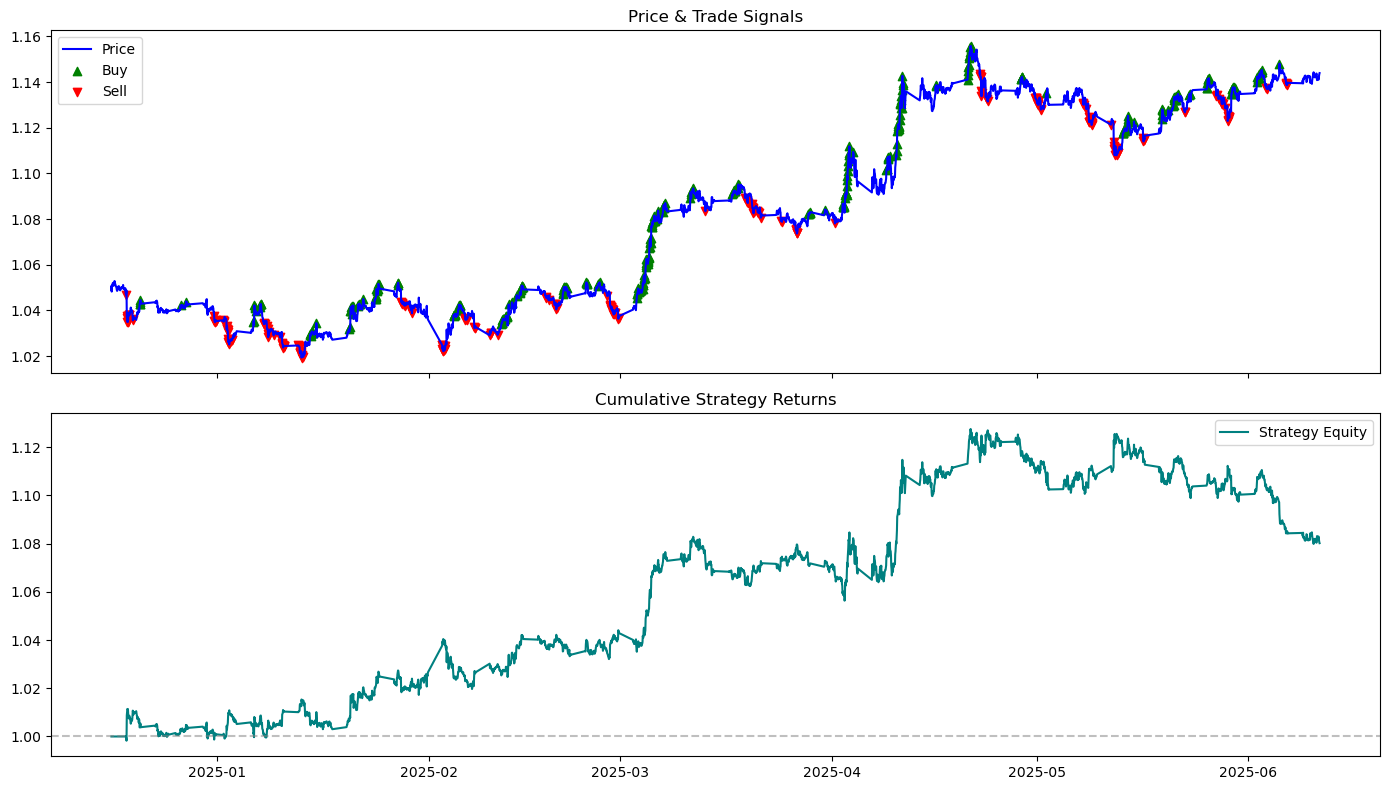

In [71]:
import oandapyV20
from oandapyV20 import API
from oandapyV20.endpoints.instruments import InstrumentsCandles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta as ta 

# =============================
# 1. Fetch Historical Data
# =============================
def fetch_data(instrument="EUR_USD", granularity="H1", count=3000):
    client = API(access_token="32a7ce5d62167ef2dda800802386d48a-496bae9b01506113e0a75dbac8e7a693",
                 environment="practice")
    params = {"granularity": granularity, "count": count}
    r = InstrumentsCandles(instrument=instrument, params=params)
    client.request(r)

    data = [{
        'datetime': candle['time'],
        'open': float(candle['mid']['o']),
        'high': float(candle['mid']['h']),
        'low': float(candle['mid']['l']),
        'close': float(candle['mid']['c']),
        'volume': candle['volume']
    } for candle in r.response['candles']]

    df = pd.DataFrame(data)
    df['datetime'] = pd.to_datetime(df['datetime'])
    df.set_index('datetime', inplace=True)
    df = df[['open', 'high', 'low', 'close', 'volume']].copy()
    return df

# =============================
# 2. Calculate Indicators
# =============================
def calculate_indicators(df):
    # VWAP
    df['vwap'] = (df['close'].cumsum() * df['volume']).cumsum() / df['volume'].cumsum()

    # RSI
    df['rsi'] = ta.rsi(df['close'], length=14)

    return df

# =============================
# 3. Normalize Components
# =============================
def normalize_vwap_rsi(df):
    df['vwap_deviation'] = (df['close'] - df['vwap']) / df['vwap']
    df['vwap_score'] = 1 / (1 + abs(df['vwap_deviation']))
    df['vwap_direction'] = np.where(df['close'] > df['vwap'], -1, 1)
    df['rsi_score'] = np.where(df['rsi'] < 30, 1,
                               np.where(df['rsi'] > 70, 0, (70 - df['rsi']) / 40))
    return df

# =============================
# 4. Combine Into One Score
# =============================
def create_custom_score(df, weight_vwap=0.5, weight_rsi=0.5):
    df['vwap_rsi_score'] = (weight_vwap * df['vwap_score'] * df['vwap_direction']) + \
                           (weight_rsi * df['rsi_score'])
    return df

# =============================
# 5. Backtest Logic: SL/TP
# =============================
def backtest_strategy(df, tp=0.01, sl=-0.01):
    df = df.copy()
    df['signal'] = 0
    df.loc[df['vwap_rsi_score'] < 0.3, 'signal'] = 1   # Long
    df.loc[df['vwap_rsi_score'] > 0.7, 'signal'] = -1  # Short

    df['position'] = df['signal'].replace(0, np.nan).ffill().fillna(0)

    # Simulate trades
    df['returns'] = df['close'].pct_change()
    df['strategy_returns'] = df['position'].shift(1) * df['returns']

    # Add SL & TP logic
    df['trade_entry_price'] = np.nan
    df['trade_exit_reason'] = ''

    in_trade = False
    position_type = 0
    entry_price = 0
    trade_log = []

    for i in range(len(df)):
        signal = df.iloc[i]['signal']
        close_price = df.iloc[i]['close']
        index = df.index[i]

        if not in_trade and signal != 0:
            in_trade = True
            position_type = signal
            entry_price = close_price
            df.at[index, 'trade_entry_price'] = entry_price
            trade_log.append({'entry_time': index, 'entry_price': entry_price, 'type': 'long' if signal == 1 else 'short'})

        elif in_trade:
            exit_reason = ''
            returns_since_entry = (close_price / entry_price - 1) * position_type

            if returns_since_entry >= tp:
                exit_reason = f'TP ({tp:.2%})'
            elif returns_since_entry <= sl:
                exit_reason = f'SL ({sl:.2%})'

            if exit_reason:
                df.at[index, 'trade_entry_price'] = np.nan
                df.at[index, 'trade_exit_reason'] = exit_reason
                trade_log[-1]['exit_time'] = index
                trade_log[-1]['exit_price'] = close_price
                trade_log[-1]['pnl'] = returns_since_entry
                trade_log[-1]['exit_reason'] = exit_reason
                in_trade = False

    trade_df = pd.DataFrame(trade_log)
    if not trade_df.empty:
        trade_df['win'] = trade_df['pnl'] > 0

    return df, trade_df

# =============================
# 6. Performance Metrics
# =============================
def performance_summary(trade_df):
    total_trades = len(trade_df)
    winning_trades = trade_df['win'].sum()
    win_rate = winning_trades / total_trades if total_trades > 0 else 0
    avg_pnl = trade_df['pnl'].mean() if not trade_df.empty else 0
    total_return = trade_df['pnl'].sum() if not trade_df.empty else 0

    print("\n=== Performance Summary ===")
    print(f"Total Trades: {total_trades}")
    print(f"Win Rate: {win_rate:.2%}")
    print(f"Avg PnL per Trade: {avg_pnl:.2%}")
    print(f"Total Return: {total_return:.2%}")

# =============================
# 7. Plot Results
# =============================
def plot_results(df):
    fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

    # Price & Signals
    axes[0].plot(df['close'], label='Price', color='blue')
    axes[0].scatter(df[df['signal'] == 1].index, df[df['signal'] == 1]['close'], marker='^', color='green', label='Buy')
    axes[0].scatter(df[df['signal'] == -1].index, df[df['signal'] == -1]['close'], marker='v', color='red', label='Sell')
    axes[0].set_title('Price & Trade Signals')
    axes[0].legend()

    # Equity Curve
    axes[1].plot((1 + df['strategy_returns']).cumprod(), label='Strategy Equity', color='teal')
    axes[1].set_title('Cumulative Strategy Returns')
    axes[1].axhline(1, linestyle='--', color='gray', alpha=0.5)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# =============================
# Main Pipeline
# =============================
if __name__ == '__main__':
    df = fetch_data(instrument="EUR_USD", granularity="H1", count=3000)
    df = calculate_indicators(df)
    df = normalize_vwap_rsi(df)
    df = create_custom_score(df)
    df, trade_df = backtest_strategy(df, tp=0.005, sl=-0.005)  # 0.5% TP/SL
    performance_summary(trade_df)
    plot_results(df)